In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot

data = load_boston()
df = pd.DataFrame(data= np.c_[data['data'], data['target']],
                     columns= list(data['feature_names']) + ['target'])

In [57]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [58]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Null values

In [59]:
for col in df.columns:
    print(col, df[col].isnull().values.sum())

CRIM 0
ZN 0
INDUS 0
CHAS 0
NOX 0
RM 0
AGE 0
DIS 0
RAD 0
TAX 0
PTRATIO 0
B 0
LSTAT 0
target 0


## Correlation Matrix

<AxesSubplot:>

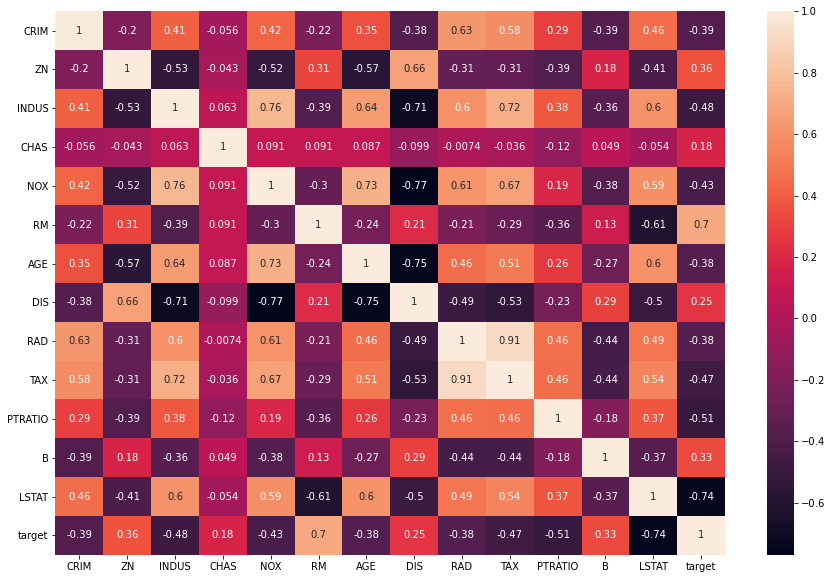

In [72]:
a4_dims = (15,10)
fig, ax = pyplot.subplots(figsize=a4_dims)
corr = df.corr()

# plot the heatmap
sns.heatmap(corr, ax=ax,
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot = True)

In [82]:
features = df.drop(['target', 'TAX'], axis=1)
labels = df['target']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [83]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(labels), 2))

0.6
0.2
0.2


## Linear Regression Model

In [84]:
import joblib
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

tr_features = X_train
tr_labels = y_train

In [85]:
tr_features.shape

(303, 12)

In [86]:
tr_labels.shape

(303,)

In [87]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [88]:
lr = LinearRegression()
parameters = {
    'fit_intercept': ['True', 'False'],
    'normalize': ['True', 'False']
}

cv = GridSearchCV(lr, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'fit_intercept': 'True', 'normalize': 'True'}

0.698 (+/-0.129) for {'fit_intercept': 'True', 'normalize': 'True'}
0.698 (+/-0.129) for {'fit_intercept': 'True', 'normalize': 'False'}
0.698 (+/-0.129) for {'fit_intercept': 'False', 'normalize': 'True'}
0.698 (+/-0.129) for {'fit_intercept': 'False', 'normalize': 'False'}


In [89]:
lr.get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize', 'positive'])

In [90]:
cv.best_estimator_

LinearRegression(fit_intercept='True', normalize='True')

In [ ]:
joblib.dump(cv.best_estimator_, '../../../LR_model.pkl')